# Assignment 1 - Classification || Machine Learning Course
# Nailfaaz || 22/498485/PA/21523

# Table of Content

1. [Library Needed](#1)
2. [All Function Goes Here](#2)
    1. [Data Description Functions](#2_1)
    2. [Visualization Functions](#2_2)
    3. [Data Splitting, Model Building, and Evaluation Functions](#2_3)
    4. [Cross Validation and Hyperparameter Functions](#2_4)
3. [Data Reading](#3)
    1. [Feature Understanding](#3_1)
    2. [Data Type Correcting](#3_2)
    3. [Initial Insight](#3_3)
4. [Exploraroty Data Analysis](#4)
    1. [Univariate Analysis](#4_1)
        1. [Univariate Insights](#4_1_1)
    2. [Bivariate Analysis](#4_2)
        1. [Bivariate Insights](#4_2_1)
    3. [Multivariate Analysis](#4_3)
        1. [Multivariate Insights](#4_3_1)
5. [Data Cleaning](#5)
    1. [Age](#5_1)
    2. [Embarked](#5_2)
    3. [Missing Value Insights](#5_3)
6. [Feature Engineering](#6)
    1. [Feature Dropping](#6_1)
    2. [Feature Creation](#6_2)
    3. [Feature Encoding](#6_3)
    4. [Feature Engineering Insight](#6_4)
7. [Modelling](#7)
    1. [Train Test Split](#7_1)
    2. [Naive Bayes](#7_2)
    3. [Model Evaluation](#7_3)
    4. [Cross Validation and Hyperparameter Tuning](#7_4)
    5. [Modelling Insights](#7_5)
8. [Submission](#8)


<a id="1"></a>
# Library Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

- Pandas used for data manipulation and analysis on the dataframe and reading the csv file.
- Numpy used for working with arrays, calculations, and mathematical operations.
- Matplotlib and Seaborn used for data visualization.

- mpl_toolkits.mplot3d used for 3D plot.

<a id="2"></a>
# All Function Goes Here

<a id="2_1"></a>
## Data Description Functions

In [2]:
def dataframe_info(df):
    info = []
    total_rows = len(df)
    
    for column in df.columns:
        column_info = {}
        column_info['Column Name'] = column
        column_info['Non-missing Values'] = df[column].notna().sum()
        column_info['Data Type'] = df[column].dtype
        column_info['Missing Values'] = df[column].isna().sum()
        column_info['Missing Percentage'] = (df[column].isna().sum() / total_rows) * 100
        column_info['Unique Values'] = df[column].nunique()
        
        info.append(column_info)
    
    return pd.DataFrame(info)

'dataframe_info()' function is used to get the information about each column of the dataframe, such as number of missing values, data type, and number of unique values.

In [3]:
def print_unique_values(df, max_unique_values=10):
    for column in df.columns:
        unique_values = df[column].dropna().unique()
        print(f"Column: {column}")
        
        if len(unique_values) > max_unique_values:
            print(f"  Unique Values (first {max_unique_values} of {len(unique_values)}): {unique_values[:max_unique_values]}")
        else:
            print(f"  Unique Values ({len(unique_values)}): {unique_values}")
        
        print()

'print_unique_values()' function is used to get the unique values of each column of the dataframe. Not all unique values are printed, only the first 10 unique values are printed or less.

<a id="2_2"></a>
## Visualization Functions

In [4]:
# Function to set the theme and color palette
def set_visualization_style(theme='darkgrid', palette='viridis'):
    sns.set_theme(style=theme)
    sns.set_palette(palette)

'set_visualization_style()' function is used to set the style of the visualization. The style can be 'darkgrid', 'whitegrid', 'dark', 'white', and 'ticks'. The theme i set to 'darkgrid' by default and the palette is set to 'viridis' by default.

In [5]:
def univariate_visualization(df, theme='darkgrid', palette='viridis'):

    set_visualization_style(theme, palette)
    
    num_columns = 3
    num_plots = len(df.columns)
    num_rows = (num_plots + num_columns - 1) // num_columns
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(df.columns):
        ax = axes[i]
        dtype = df[column].dtype
        
        if pd.api.types.is_numeric_dtype(dtype):
            # Numerical column
            sns.histplot(df[column].dropna(), kde=True, ax=ax, color=sns.color_palette(palette)[0])
            ax.set_title(f"Distribution of {column}")
            ax.set_xlabel(column)
            ax.set_ylabel("Frequency")
            
            # Calculate statistics
            mean = df[column].mean()
            q1 = df[column].quantile(0.25)
            q2 = df[column].quantile(0.5)
            q3 = df[column].quantile(0.75)
            
            # Add text box with statistics
            stats_text = (f'Mean: {mean:.2f}\n'
                          f'Q1: {q1:.2f}\n'
                          f'Q2: {q2:.2f}\n'
                          f'Q3: {q3:.2f}')
            props = dict(boxstyle='round', facecolor='white', alpha=0.5)
            ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='right', bbox=props)
        
        else:
            # Categorical column
            value_counts = df[column].value_counts().sort_values(ascending=False)
            num_categories = min(len(value_counts), 10)
            top_categories = value_counts.head(num_categories)
            total = value_counts.sum()
            sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax, order=top_categories.index, palette=sns.color_palette(palette, num_categories))
            ax.set_title(f"Top {num_categories} Categories of {column}")
            ax.set_xlabel("Frequency")
            ax.set_ylabel(column)
            
            # Annotate
            for j in range(num_categories):
                count = top_categories.values[j]
                percentage = f'{count / total:.1%}'
                ax.text(count, j, f' {percentage}', va='center', ha='left', color='black')
            
            max_count = top_categories.values[0]
            ax.set_xlim(0, max_count * 1.8)
        
        ax.grid(True)
    
    for j in range(num_plots, num_rows * num_columns):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


'univariate_visualization()' function is used to plot the univariate analysis of the dataframe. The function plots the countplot for categorical columns and the distplot for numerical columns, it is used to understand the distribution a column of the data.

In [6]:
def bivariate_analysis_cat_num(df, cat_col, num_col, theme='darkgrid', palette='viridis'):

    set_visualization_style(theme, palette)
    
    if not (pd.api.types.is_categorical_dtype(df[cat_col]) or pd.api.types.is_object_dtype(df[cat_col])):
        raise ValueError(f"{cat_col} is not a categorical column.")
    if not pd.api.types.is_numeric_dtype(df[num_col]):
        raise ValueError(f"{num_col} is not a numerical column.")
    
    plt.figure(figsize=(14, 6))
    
    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_col, y=num_col)
    plt.title(f'Box Plot: {cat_col} vs {num_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    
    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_col, y=num_col)
    plt.title(f'Violin Plot: {cat_col} vs {num_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

'bivariate_analysis_cat_num()' function is used to plots the boxplot and violinplt, it is used to understand the relationship between a numerical column and a categorical column.

In [7]:
def bivariate_analysis_categorical(df, col1, col2, palette='viridis'):
    if not (pd.api.types.is_categorical_dtype(df[col1]) or pd.api.types.is_object_dtype(df[col1])):
        raise ValueError(f"{col1} is not a categorical column.")
    if not (pd.api.types.is_categorical_dtype(df[col2]) or pd.api.types.is_object_dtype(df[col2])):
        raise ValueError(f"{col2} is not a categorical column.")

    count_data = df.groupby([col1, col2]).size().reset_index(name='count')
    total_counts = count_data.groupby(col1)['count'].sum().reset_index(name='total')
    count_data = pd.merge(count_data, total_counts, on=col1)
    count_data['percentage'] = (count_data['count'] / count_data['total']) * 100

    plt.figure(figsize=(12, 6))
    bar_plot = sns.countplot(data=df, x=col1, hue=col2, palette=palette)
    plt.title(f'Bivariate Analysis: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.legend(title=col2)
    plt.xticks(rotation=45)
    
    # Add percentages
    for p in bar_plot.patches:
        height = p.get_height()
        total = df[col1].count()
        percentage = height / total * 100
        bar_plot.text(
            p.get_x() + p.get_width() / 2, 
            height + 6, 
            f'({percentage:.1f}%)', 
            ha="center", 
            fontsize=12
        )

    plt.tight_layout()
    plt.show()

'bivariate_analysis_categorical()' function is used to plot the countplot, it is used to understand the relationship between two categorical columns.

<a id="2_3"></a>
## Data Splitting, Model Building, and Evaluation Functions

In [8]:
def train_test_split_custom(df, target_column, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    shuffled_df = df.sample(frac=1).reset_index(drop=True)
    test_split_idx = int(len(shuffled_df) * test_size)
    
    X = shuffled_df.drop(columns=[target_column])
    y = shuffled_df[target_column]
    
    test_X = X.iloc[:test_split_idx]
    train_X = X.iloc[test_split_idx:]
    test_y = y.iloc[:test_split_idx]
    train_y = y.iloc[test_split_idx:]
    
    return train_X, test_X, train_y, test_y

'train_test_split_custom()' function is used to split the data into training and testing sets. The function takes the dataframe and the target column as input and returns the training and testing sets. Other parameters such as test_size to set the size of the testing set and random_state to set the seed for the random number generator.

In [9]:
class BernoulliNaiveBayes:
    def __init__(self, alpha=1.0):

        self.alpha = alpha
        self.classes = None
        self.class_priors = None
        self.feature_probs = None
    
    def fit(self, X, y):

        # Get unique class labels
        self.classes = np.unique(y)
        num_classes = len(self.classes)
        num_features = X.shape[1]
        
        # Compute class priors
        self.class_priors = {}
        for c in self.classes:
            self.class_priors[c] = (np.sum(y == c) + self.alpha) / (len(y) + num_classes * self.alpha)
        
        # Compute conditional probabilities of features given the class 
        self.feature_probs = {c: np.ones(num_features) * self.alpha for c in self.classes}
        feature_sums = {c: 2 * self.alpha for c in self.classes}
        
        for c in self.classes:
            X_c = X[y == c]
            self.feature_probs[c] += np.sum(X_c, axis=0)
            feature_sums[c] += len(X_c)
        
        for c in self.classes:
            self.feature_probs[c] /= feature_sums[c]
        
        # Avoid log(0) by clipping probabilities to a very small value
        for c in self.classes:
            self.feature_probs[c] = np.clip(self.feature_probs[c], 1e-10, 1 - 1e-10)
    
    def predict(self, X):
        num_samples = X.shape[0]
        num_classes = len(self.classes)
        
        log_priors = np.log([self.class_priors[c] for c in self.classes])
        log_probs = np.zeros((num_samples, num_classes))
        
        for i, c in enumerate(self.classes):
            log_prob_c = X * np.log(self.feature_probs[c]) + (1 - X) * np.log(1 - self.feature_probs[c])
            log_probs[:, i] = np.sum(log_prob_c, axis=1) + log_priors[i]
        
        return self.classes[np.argmax(log_probs, axis=1)]

'BernoulliNaiveBayes' class contains the functions to train and predict using the Bernoulli Naive Bayes algorithm. The class contains the following functions:
- 'fit()' function is used to train the model. The function takes the training data and the target column as input and fits the model. In short explanation, it calculates the prior probability of each class and the likelihood of each feature given the class.
- 'predict()' function is used to predict the target column using the trained model. The function takes the testing data as input and returns the predicted values.

In [10]:
def evaluate_model(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    precision = {}
    recall = {}
    f1_score = {}
    classes = np.unique(y_true)
    
    for c in classes:
        tp = np.sum((y_true == c) & (y_pred == c))
        fp = np.sum((y_true != c) & (y_pred == c))
        fn = np.sum((y_true == c) & (y_pred != c))
        
        precision[c] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[c] = tp / (fn + tp) if (fn + tp) > 0 else 0
        f1_score[c] = (2 * precision[c] * recall[c]) / (precision[c] + recall[c]) if (precision[c] + recall[c]) > 0 else 0
    
    avg_precision = np.mean(list(precision.values()))
    avg_recall = np.mean(list(recall.values()))
    avg_f1_score = np.mean(list(f1_score.values()))
    
    return accuracy, avg_precision, avg_recall, avg_f1_score

'evaluate_model()' function is used to evaluate the model. The function takes the actual values and the predicted values as input and returns the accuracy of the model. There are 4 metrics used to evaluate the model, such as accuracy, precision, recall, and f1-score.
- Accuracy is the ratio of correctly predicted observations to the total observations.
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
- Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
- F1-score is the weighted average of Precision and Recall.

<a id="2_4"></a>
## Cross Validation and Hyperparameter Tuning Functions

In [11]:
def cross_val_score(model, X, y, cv=5, random_state=None):

    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    fold_size = len(X) // cv
    scores = []
    
    for fold in range(cv):
        test_idx = indices[fold * fold_size:(fold + 1) * fold_size]
        train_idx = np.concatenate([indices[:fold * fold_size], indices[(fold + 1) * fold_size:]])
        
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = np.mean(y_test == predictions)
        scores.append(accuracy)
    
    return scores

'cross_validation()' function is used to perform cross-validation on the model. The function takes the dataframe, the target column, the number of folds, and the model as input and returns the accuracy of the model. It works by splitting the data into k-folds and training the model on k-1 folds and testing on the remaining fold. This process is repeated k times and the average accuracy is calculated.

In [12]:
def grid_search(model_class, X, y, param_grid, cv=5, random_state=None):

    best_score = -np.inf
    best_params = None
    
    for params in param_grid:
        model = model_class(**params)
        scores = cross_val_score(model, X, y, cv=cv, random_state=random_state)
        avg_score = np.mean(scores)
        
        if avg_score > best_score:
            best_score = avg_score
            best_params = params
    
    return best_params, best_score

'grid_search()' function is used to perform grid search on the model. The function takes dataframe, target column, model, and hyperparameters as input. It works by training the model on different combinations of hyperparameters and selecting the best combination that gives the highest accuracy.

<a id="3"></a>
# Data Reading

In [13]:
df = pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="3_1"></a>
## Feature Understanding

In [14]:
dataframe_info(df)

,Column Name,Non-missing Values,Data Type,Missing Values,Missing Percentage,Unique Values
0,PassengerId,891,int64,0,0.000000,891
1,Survived,891,int64,0,0.000000,2
2,Pclass,891,int64,0,0.000000,3
3,Name,891,object,0,0.000000,891
4,Sex,891,object,0,0.000000,2
5,Age,714,float64,177,19.865320,88
6,SibSp,891,int64,0,0.000000,7
7,Parch,891,int64,0,0.000000,7
8,Ticket,891,object,0,0.000000,681
9,Fare,891,float64,0,0.000000,248


In [15]:
print_unique_values(df)

Column: PassengerId
  Unique Values (first 10 of 891): [ 1  2  3  4  5  6  7  8  9 10]

Column: Survived
  Unique Values (2): [0 1]

Column: Pclass
  Unique Values (3): [3 1 2]

Column: Name
  Unique Values (first 10 of 891): ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']

Column: Sex
  Unique Values (2): ['male' 'female']

Column: Age
  Unique Values (first 10 of 88): [22. 38. 26. 35. 54.  2. 27. 14.  4. 58.]

Column: SibSp
  Unique Values (7): [1 0 3 4 2 5 8]

Column: Parch
  Unique Values (7): [0 1 2 5 3 4 6]

Column: Ticket
  Unique Values (first 10 of 681): ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736']

Column: Fare
  

It turns out that the dataset contains 3 columns with missing values. 
- 'Cabin' column has too many missing values, so it is better to drop the column. 
- 'Age' column has 20% missing values, so it is better to do some analysis and fill the missing values. 
- 'Embarked' column has 2 missing values.

<a id="3_2"></a>
## Data Type Correcting

In [16]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')

Some of the columns have the wrong data type. 
- 'Survived' column should be a categorical column since it only contains 0 and 1 values and indicates whether the passenger survived or not,
- 'Pclass' column should be a categorical column since it only contains 1, 2, and 3 values and indicates the class of the passenger,
- 'SibSp' indicates the number of siblings or spouses aboard the Titanic, even if it is a numerical column, it is better to convert it to a categorical column since it only contains 0, 1, 2, 3, 4, 5, and 8 values(limited numerical)
- same goes for 'Parch' column, it indicates the number of parents or children aboard the Titanic, even if it is a numerical column, it is better to convert it to a categorical column since it only contains 0, 1, 2, 3, 4, 5, 6 values(limited numerical)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(4), float64(2), int64(1), object(5)
memory usage: 60.2+ KB


<a id="3_3"></a>
## Initial Insights

Insights that we can get from the data:
- The dataset contains <strong style="color:#ff7f7f;">891 rows</strong> and <strong style="color:#ff7f7f;">12 columns</strong>.
- The dataset contains <strong style="color:#ff7f7f;">2 numerical columns</strong> (fare and age) and <strong style="color:#ff7f7f;">5 categorical columns</strong>. (after converting 'Pclass', 'SibSp', and 'Parch' columns to categorical columns)
- There are <strong style="color:#ff7f7f;">2 columns with huge missing values</strong>, such as <strong style="color:#ff7f7f;">'Cabin' and 'Age'</strong> columns.
- 'Ticket' column contains a lot of unique values.
- 'Name' also contains a lot of unique values, but it can be used to <strong style="color:#ff7f7f;">extract the title of the passenger</strong>.

<a id="4"></a>
# Exploratory Data Analysis

In [18]:
df_a = df.copy()

In [19]:
df_a = df_a.drop(columns=['PassengerId', 'Name', 'Ticket'])

I made a copy of the original dataframe to do the exploratory data analysis so that the original dataframe is not affected.

'PassengerId', 'Name', and 'Ticket' columns are dropped since they are not useful for the analysis and act as identifiers.

<a id="4_1"></a>
## Univariate Analysis

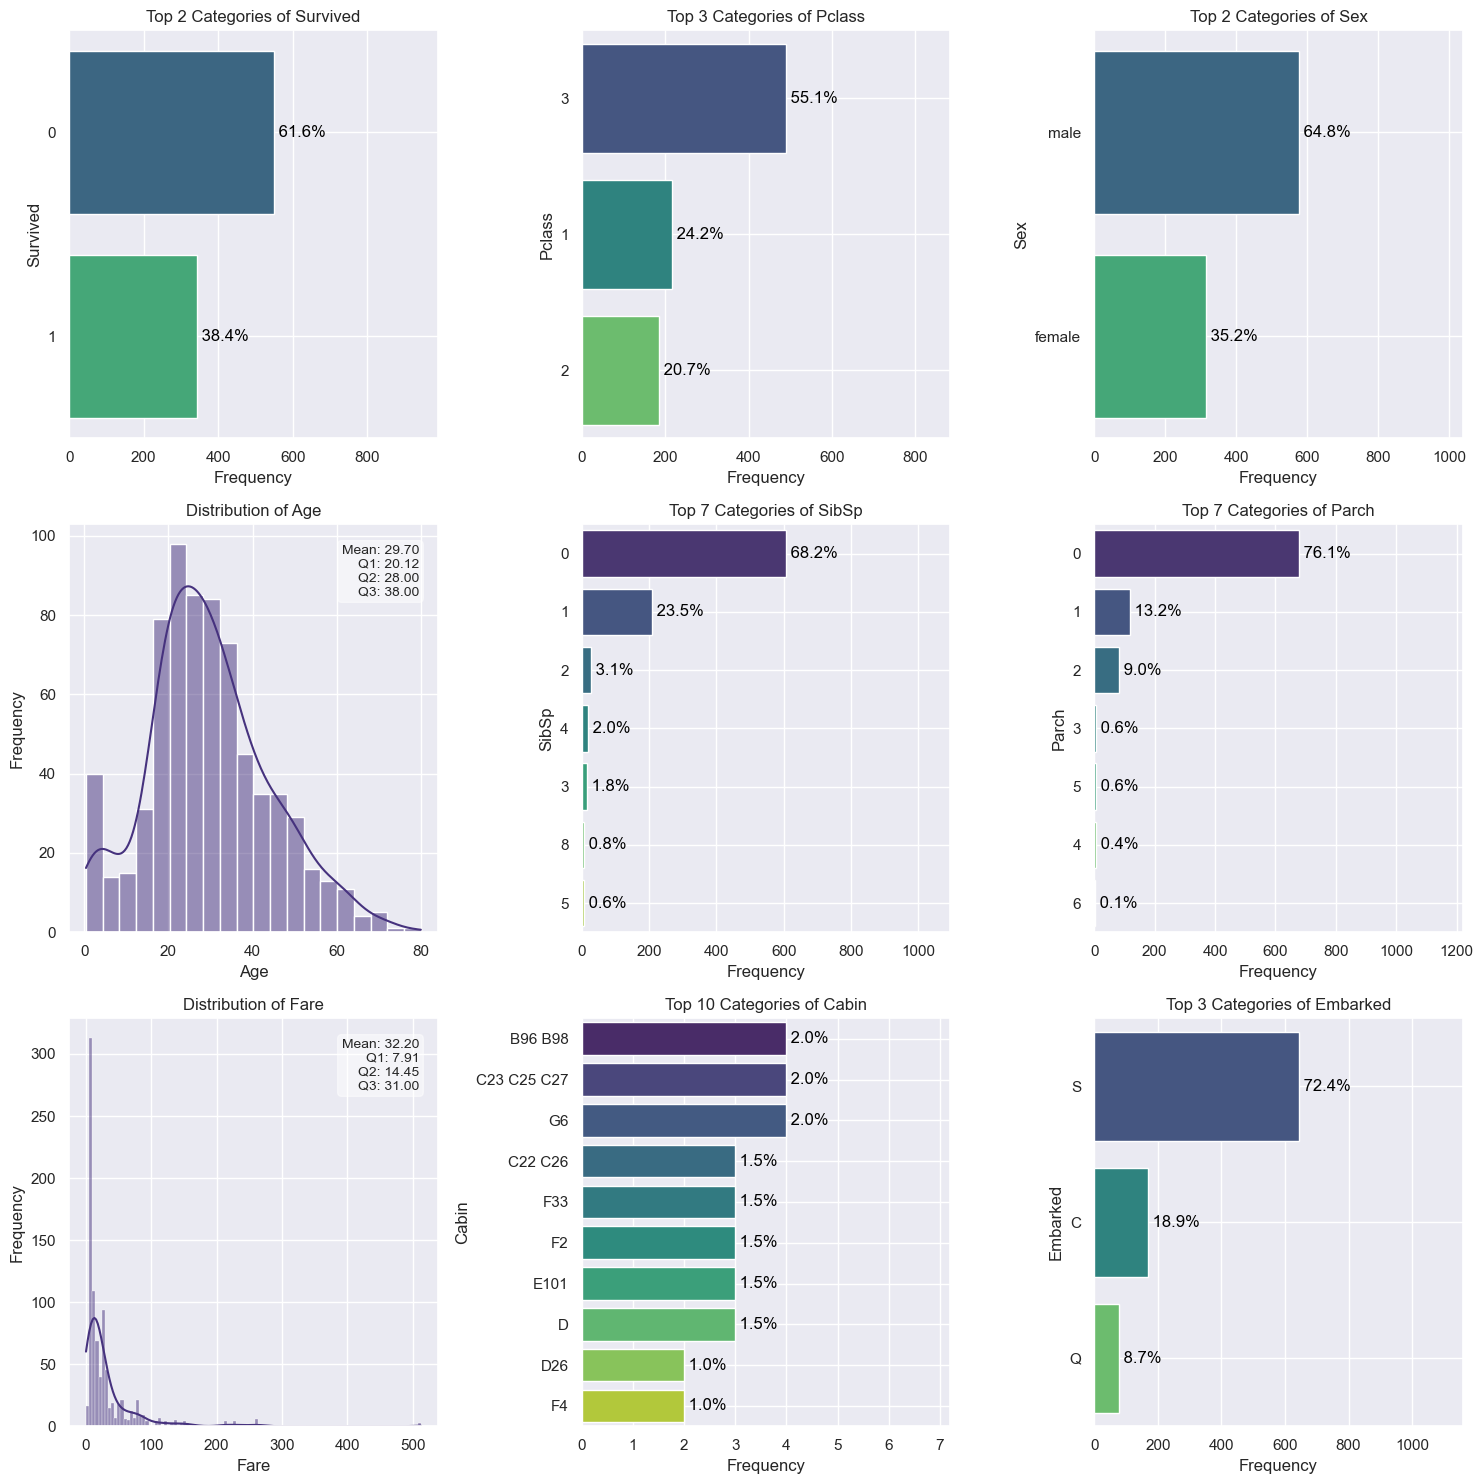

In [20]:
univariate_visualization(df_a)

<a id="4_1_1"></a>
### Univariate Insights

1. Numerical Columns

- Age
    - The <strong style="color:#ff7f7f;">age distribution is right-skewed</strong>, with a mean age of approximately 29.70 years.
    - Most common age range appears to be between 20 and 40 years.
    - The age distribution shows a noticeable peak around the age of 25.

- Fare
    - The fare distribution is highly skewed to the right, with a mean fare of 32.20. (of course, there might be some VIP passengers who paid a lot of money)
    - <strong style="color:#ff7f7f;">Most common fare range appears to be between 0 and 50</strong>.
    - There are also some values with a fare of 0, which might be due to some error in the data or free tickets.

2. Categorical Columns

- Survived
    - The number of <strong style="color:#ff7f7f;">passengers who did not survive is higher than the number of passengers who survived</strong>.
    - The dataset is a <strong style="color:#ff7f7f;">little imbalanced</strong>.

- Gender
    - There were <strong style="color:#ff7f7f;">more male passengers (64.8%)</strong> than female passengers (35.2%).

- Pclass
    - The number of passengers in the 3rd class is higher than the number of passengers in the 1st and 2nd classes.
    - The number of passengers in the 1st class is the lowest

- Siblings/Spouses Aboard
    - Majority, 68.2% of passengers did not have any siblings or spouses aboard.

- Parents/Children Aboard   
    - Majority, 76.1% of passengers did not have any parents or children aboard.

<a id="4_2"></a>
## Bivariate Analysis

### Gender vs Survived

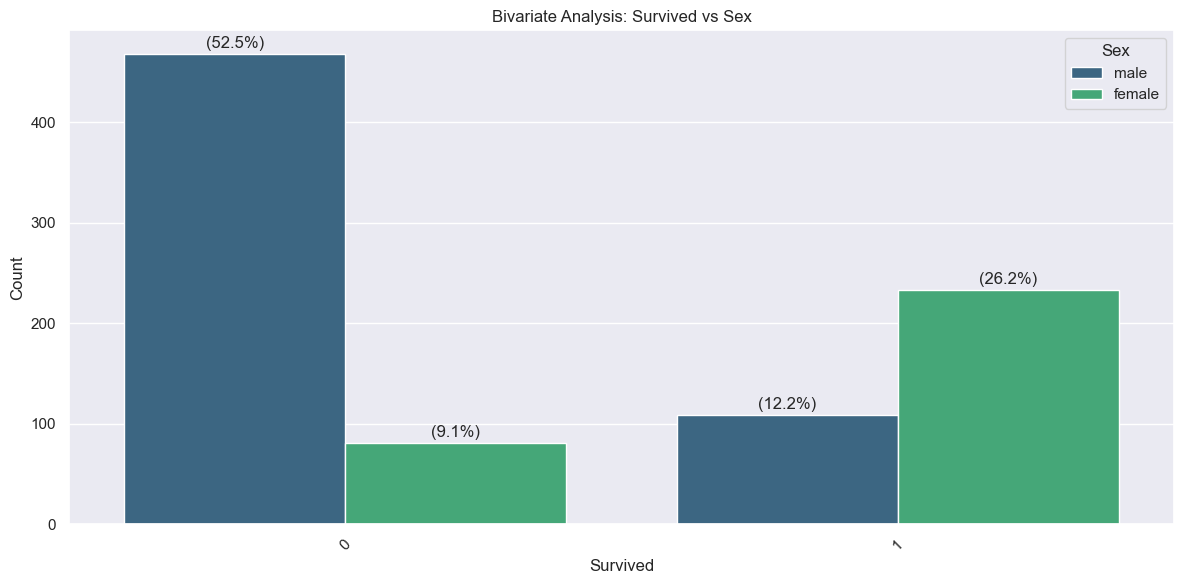

In [21]:
bivariate_analysis_categorical(df_a, 'Survived', 'Sex')

### Age vs Survived

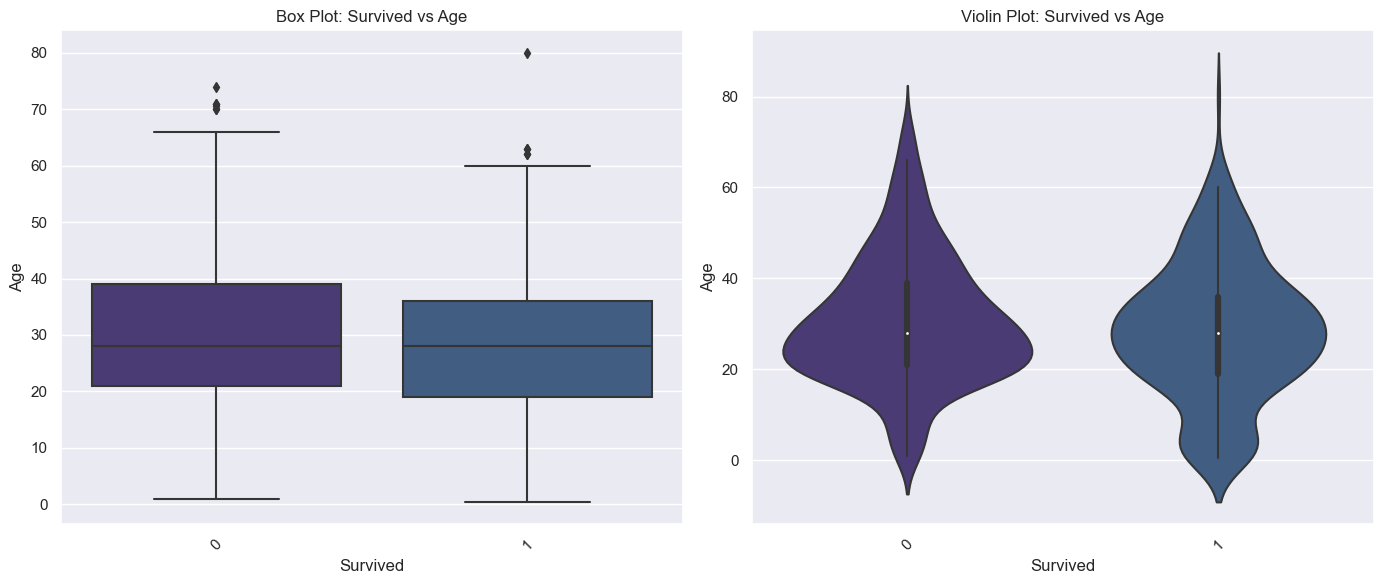

In [22]:
bivariate_analysis_cat_num(df_a, 'Survived', 'Age')

In [23]:
# do binning on age for better understanding
df_a['Age_bin'] = pd.cut(df_a['Age'], bins=[0, 5, 16, 32, 48, 64, 100], labels=['0-5', '5-16', '16-32', '32-48', '48-64', '64+'])

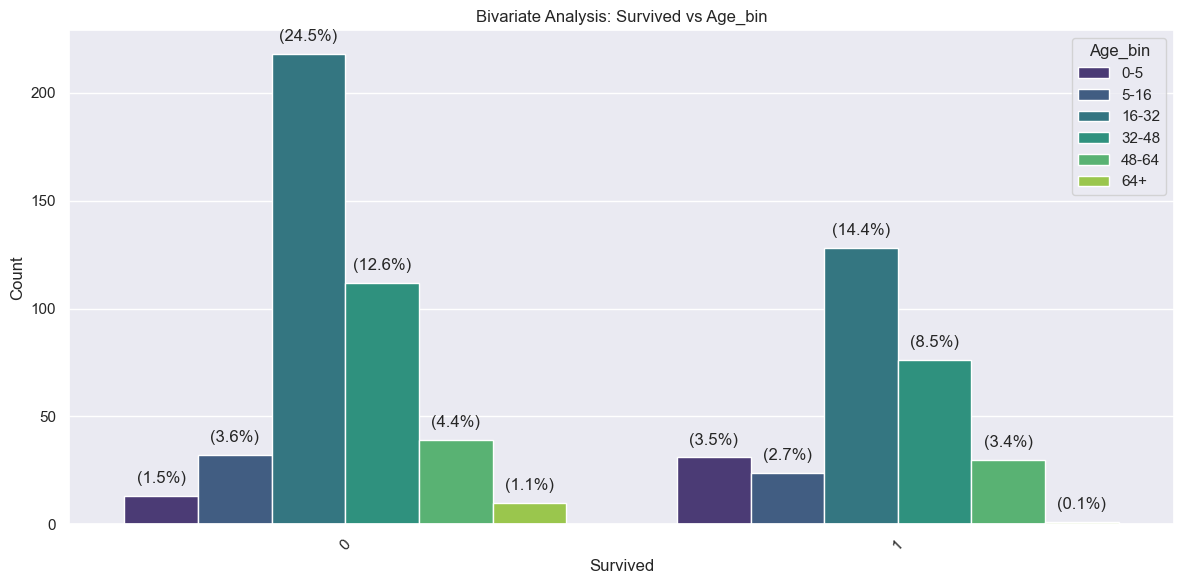

In [24]:
bivariate_analysis_categorical(df_a, 'Survived', 'Age_bin')

### P Class vs Survived

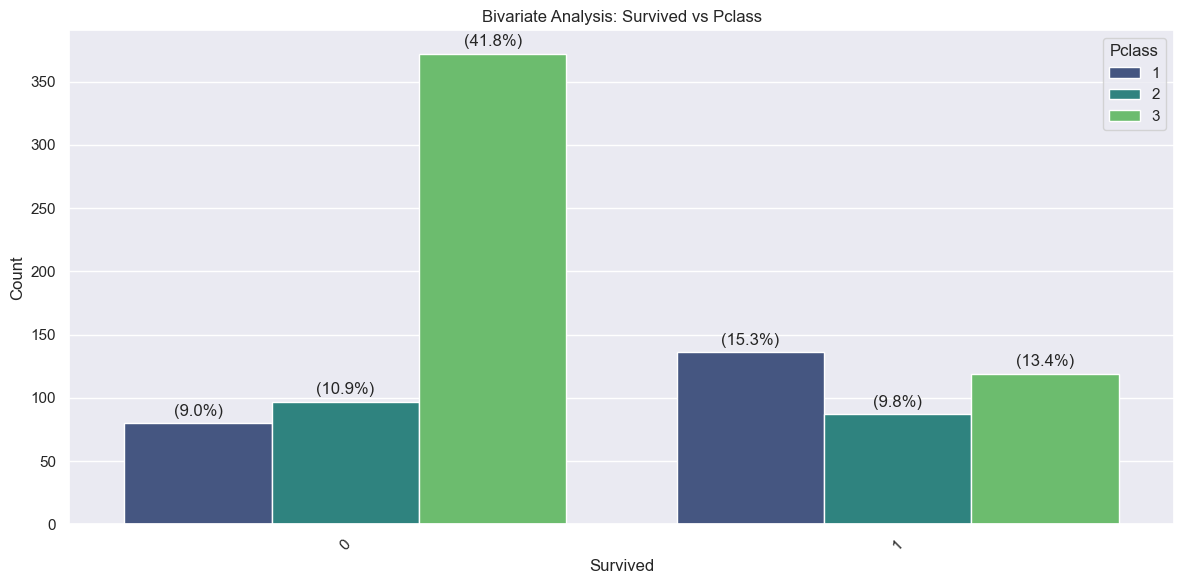

In [25]:
bivariate_analysis_categorical(df_a, 'Survived', 'Pclass')

### SibSp vs Survived

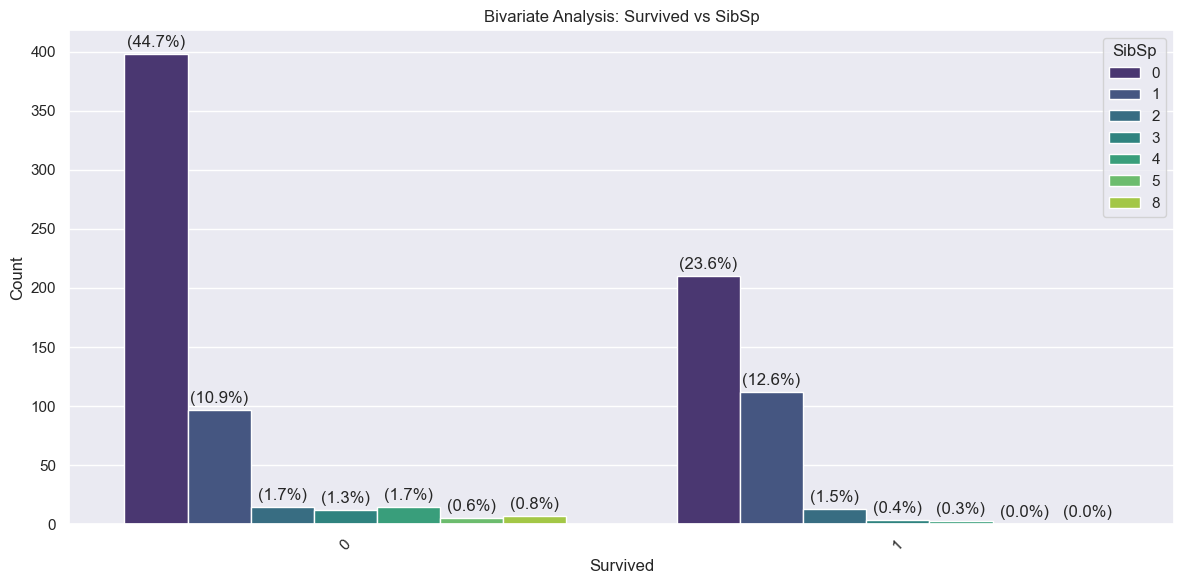

In [26]:
bivariate_analysis_categorical(df_a, 'Survived', 'SibSp')

### Parch vs Survived

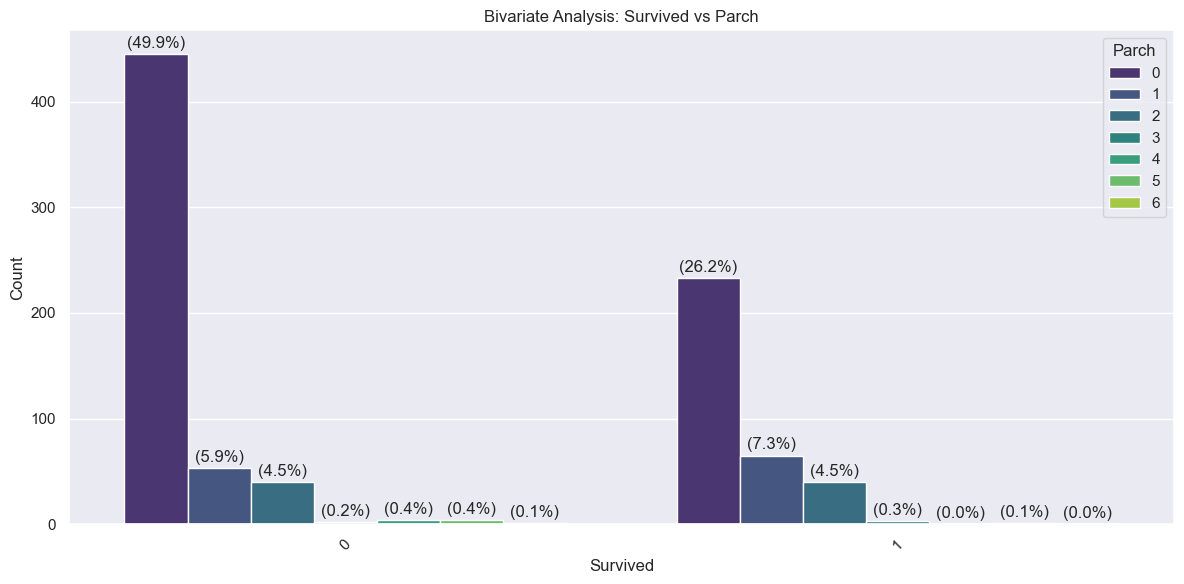

In [27]:
bivariate_analysis_categorical(df_a, 'Survived', 'Parch')

### Fare vs Survived

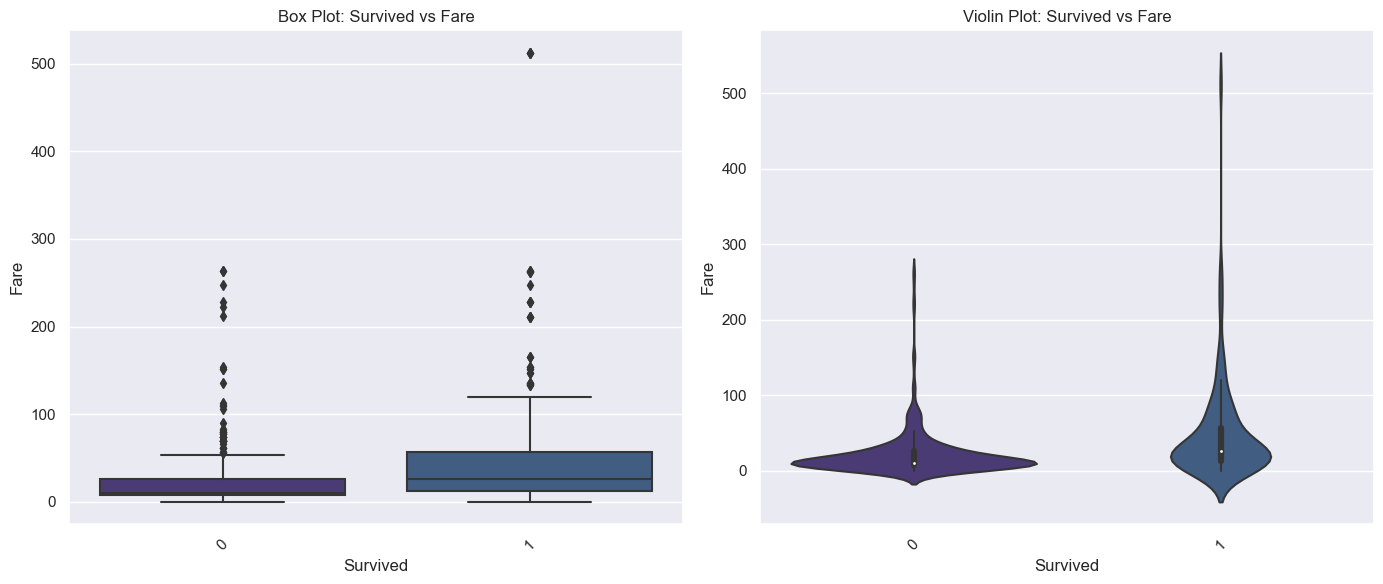

In [28]:
bivariate_analysis_cat_num(df_a, 'Survived', 'Fare')

In [29]:
# do binning on fare for better understanding
df_a['Fare_bin'] = pd.cut(df_a['Fare'], bins=[0, 10, 20, 30, 40, 50, 100, 200, 300, 600], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '300+'])

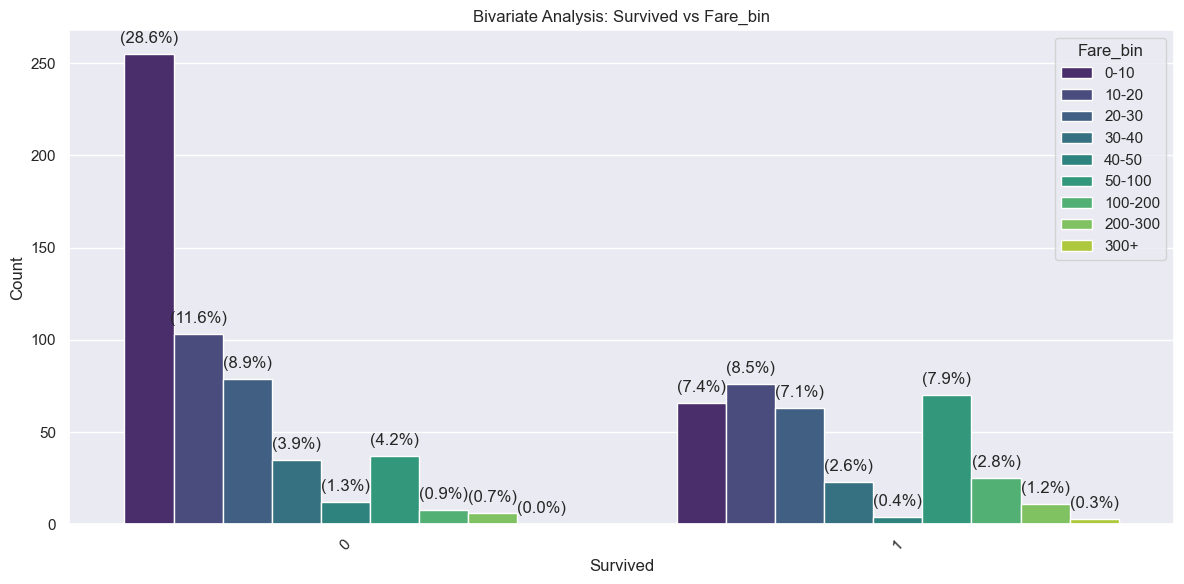

In [30]:
bivariate_analysis_categorical(df_a, 'Survived', 'Fare_bin')

<a id="4_2_1"></a>
### Bivariate Insights

Some of the insights from the bivariate analysis are:

- The <strong style="color:#ff7f7f;">survival rate for female passengers was substantially higher</strong> compared to male passengers, reflecting the gender-based priority in rescue efforts.
- Distribution of age for passengers who survived and did not survive is similar, but the number of passengers who survived is higher for the age group between 20 and 40 years.
- Having no siblings or spouses aboard has a fewer chance of survival, but <strong style="color:#ff7f7f;">**having 1 sibling or spouse aboard has a slight higher chance of survival**</strong>, at least closer to 1:1 ratio.
- People who paid <strong style="color:#ff7f7f;">more fare have a higher chance of survival</strong>. Long live capitalism!

<a id="4_3"></a>
## Multivariate Analysis

### Fare vs Class vs Survived

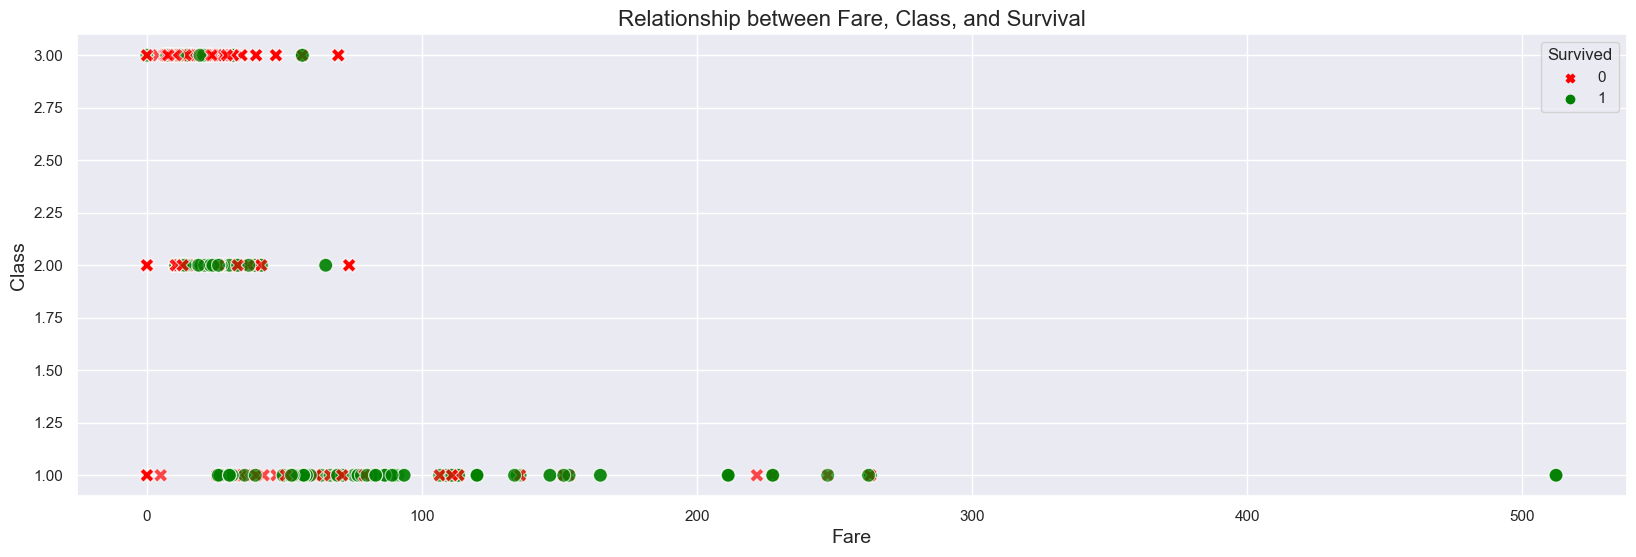

In [31]:
plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(data=df, x='Fare', y='Pclass', hue='Survived', palette={0: 'red', 1: 'green'}, style='Survived', markers={0: 'X', 1: 'o'}, s=100, alpha=0.7)

plt.title('Relationship between Fare, Class, and Survival', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Class', fontsize=14)
plt.gca().invert_yaxis()
plt.legend(title='Survived', loc='upper right')

plt.show()

### Gender vs Age vs Survived

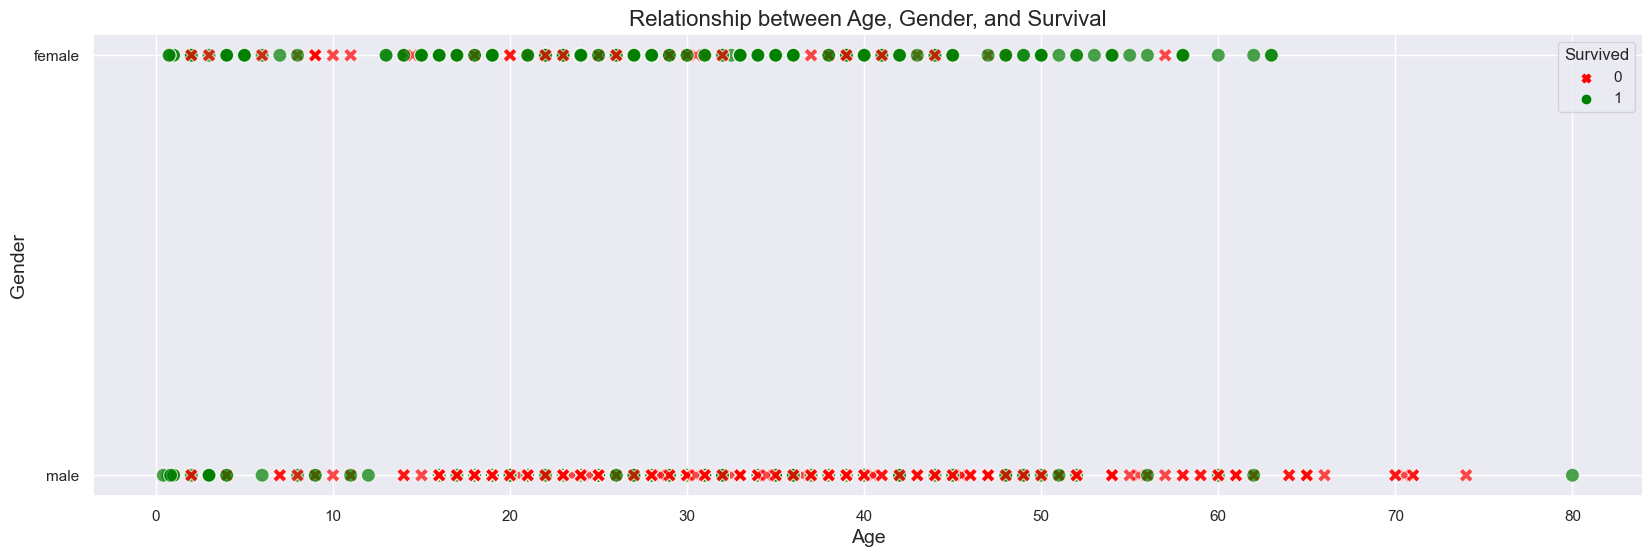

In [32]:
plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(data=df, x='Age', y='Sex', hue='Survived', palette={0: 'red', 1: 'green'}, style='Survived', markers={0: 'X', 1: 'o'}, s=100, alpha=0.7)

plt.title('Relationship between Age, Gender, and Survival', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.gca().invert_yaxis()
plt.legend(title='Survived', loc='upper right')

plt.show()

### SibSp vs Parch vs Survived

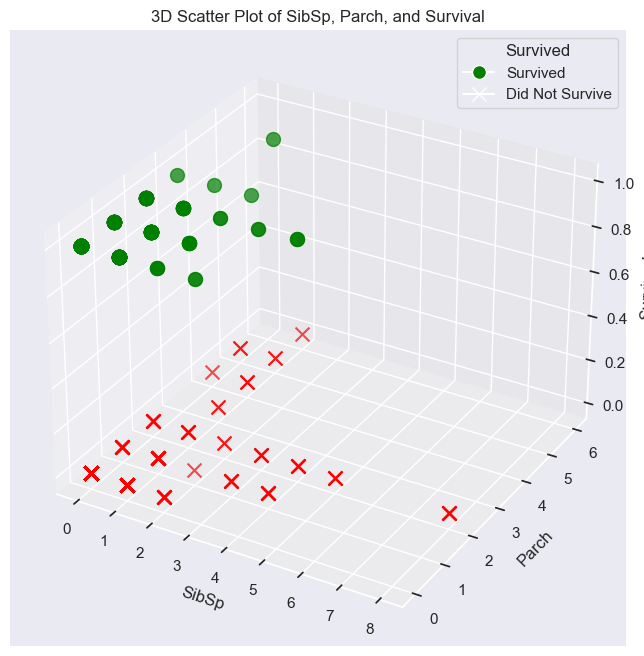

In [33]:
colors = df['Survived'].map({0: 'red', 1: 'green'})
markers = df['Survived'].map({0: 'x', 1: 'o'})

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df)):
    ax.scatter(df['SibSp'][i], df['Parch'][i], df['Survived'][i], c=colors[i], marker=markers[i], s=100, alpha=0.7)

ax.set_title('3D Scatter Plot of SibSp, Parch, and Survival')
ax.set_xlabel('SibSp')
ax.set_ylabel('Parch')
ax.set_zlabel('Survived')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Survived'),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='red', markersize=10, label='Did Not Survive')
]
ax.legend(handles=legend_elements, title="Survived")

plt.show()

<a id="4_3_1"></a>
## Multivariate Insights

from the multivariate visualization, we can see that:
- <strong style="color:#ff7f7f;">'Pclass' with value 1 has broad range of fare and highest survival rate</strong>. There are outliers, such as passenger with 0 fare in 1st class(free ticket maybe?) and passenger with 512 fare. Also, the distribution of survived passenger is ranged in 1st class, <strong style="color:#ff7f7f;">some with high fare did not survive and some with low fare survived</strong>.

- The majority of <strong style="color:#ff7f7f;">male passengers who did survided are between 0-10(child)</strong>. Almost all males with age 20-50 did not survive. In the other, <strong style="color:#ff7f7f;">distribution of female passengers who survived is more spread out</strong>.

- Passengers who have a lot of siblings or spouses aboard and parents or children aboard have a lower chance of survival. <strong style="color:#ff7f7f;">Almost all passengers with >4 SipSp or >5 Parch did not survive</strong>.

<a id="5"></a>
# Data-Cleaning

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id="5_1"></a>
## Age Missing Values Handling

In [35]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')

df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [36]:
df['Title'].replace(
    ['Mlle', 'Mme' , 'Ms'  , 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col'  , 'Rev'  , 'Capt', 'Sir', 'Don'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr'   , 'Mrs' , 'Mrs'     , 'Other'   , 'Other', 'Other', 'Mr'  , 'Mr' , 'Mr'],
    inplace=True
)

In [37]:
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))

<a id="5_2"></a>
## Embarked Missing Values Handling

In [38]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<a id="5_3"></a>
## Missing Value Insights

As mentioned before, 
- 'Cabin' column has too many missing values, so it is better to drop the column.
- 'Age' column has 20% missing values, turns out <strong style="color:#ff7f7f;">'Age' has a difference distributions related to Title of the Name</strong>, so I decided to <strong style="color:#ff7f7f;">fill the missing values based on the Title of the Name</strong>. 
- 'Embarked' column has 2 missing values, I decided to fill the missing values with the most frequent value.

<a id="6"></a>
# Feature Engineering

<a id="6_2"></a>
## Feature Creation

In [39]:
df['Age_bin'] = pd.cut(df['Age'], bins=[0, 16, 32, 48, 64, 100], labels=['0-16', '16-32', '32-48', '48-64', '64+'])

df['Total_Relatives'] = df['SibSp'].astype('int64') + df['Parch'].astype('int64')
df['Total_Relatives'].astype('category')

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Total_Relatives, Length: 891, dtype: category
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 10]

In [40]:
df['Fare_bin'] = pd.cut(df['Fare'], bins=[0, 10, 20, 30, 40, 50, 100, 200, 300, 400], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '400+'])

<a id="6_3"></a>
## Feature Encoding

In [41]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_bin', 'Total_Relatives', 'Title', 'Fare_bin'], drop_first=True)

In [42]:
df = df.replace({True: 1, False: 0})

<a id="6_1"></a>
## Feature Dropping

In [43]:
df = df.drop(['PassengerId', 'Name', 'Cabin','Ticket', 'Fare', 'Age'], axis=1)

<a id="6_4"></a>
## Feature Engineering Insights

the following features are created:
- 'Title' column is created by extracting the title from the 'Name' column.
- 'Total_Relatives' column is created by adding the 'SibSp' and 'Parch' columns.
- 'Fare_bin' column is created by binning the 'Fare' into 9 categories.
- 'Age_bin' column is created by binning the 'Age' into 5 categories.

<strong style="color:#ff7f7f;">Unnecessary columns are also dropped</strong>, such as 'PassangedId', 'Name', 'Ticket', 'Cabin', and 'Ticket' columns.

I also do encoding for the categorical columns using the get_dummies function and replace string values like True and False with 1 and 0. It is used to convert the categorical columns into numerical columns.

<strong style="color:#ff7f7f;">The final dataset only contains binary columns</strong>, which are more suitable for the Naive Bayes algorithm.

<a id="7"></a>
# Modelling

In [44]:
# add column Title_Master and Parch_9 to the dataframe because they are not present in the test data
df['Title_Master'] = 0
df['Parch_9'] = 0

<a id="7_1"></a>
## Train-Test Splitting

In [45]:
train_X, test_X, train_y, test_y = train_test_split_custom(df, target_column='Survived', test_size=0.2, random_state=42)

In [46]:
train_X, test_X = train_X.values, test_X.values
train_y, test_y = train_y.values, test_y.values

In [47]:
print(np.unique(train_X))
print(np.unique(test_X))

[0 1]
[0 1]


<a id="7_2"></a>
## Naive Bayes

In [48]:
bnb_model = BernoulliNaiveBayes(alpha=1.0)
bnb_model.fit(train_X, train_y)

predictions = bnb_model.predict(test_X)

Naive bayes bernoulli type is used because a lot of the features are binary and the target is binary. 

alpha is set to 1, which is the default value. alpha is the smoothing parameter, it is used to avoid zero probabilities in the likelihood calculation.

<a id="7_3"></a>
## Evaluation

In [49]:
accuracy, precision, recall, f1_score = evaluate_model(test_y, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.7921
Precision: 0.7854
Recall: 0.7841
F1 Score: 0.7847


In [50]:
classes = np.unique(test_y)
num_classes = len(classes)
matrix = np.zeros((num_classes, num_classes), dtype=int)
    
for i in range(num_classes):
    for j in range(num_classes):
        matrix[i, j] = np.sum((test_y == classes[i]) & (predictions == classes[j]))

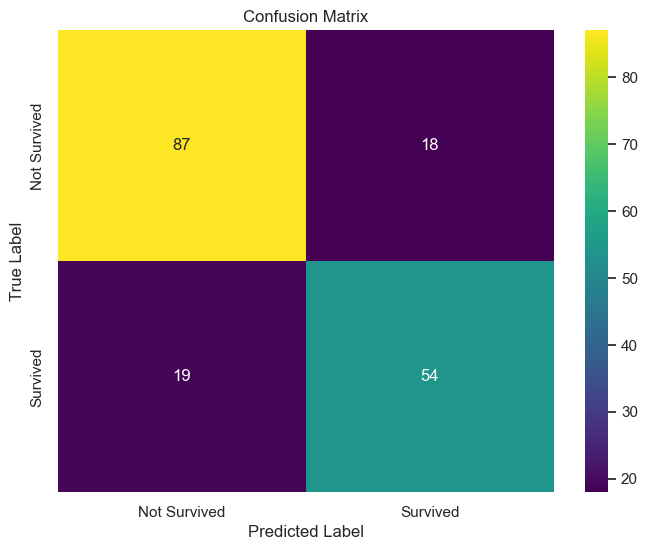

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<a id="7_4"></a>
## Cross Validation and Hyperparameter Tuning

In [52]:
param_grid = [
    {'alpha': 0.1},
    {'alpha': 0.5},
    {'alpha': 1.0},
    {'alpha': 2.0},
    {'alpha': 5.0}
]

X = df.drop(columns=['Survived']).values
y = df['Survived'].values

best_params, best_score = grid_search(BernoulliNaiveBayes, X, y, param_grid, cv=3, random_state=42)

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)


Best Parameters: {'alpha': 0.5}
Best CV Score: 0.8058361391694725


<a id="7_5"></a>
## Modelling Insights


- <strong style="color:#ff7f7f;">Base model has an accuracy of 0.78</strong>, which is quite good considering the simplicity of the model.
- Metric value from base model similar from each other, which means the <strong style="color:#ff7f7f;">model is not focused on one class</strong>.
- After using CV and hyperparameter tuning, the <strong style="color:#ff7f7f;">accuracy of the model increased to an average accuracy 0.805</strong>, which is better than the base model.

<a id="8"></a>
# Submission

In [53]:
test = pd.read_csv('test_to_submit.csv')

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [55]:
passenger_id = test['PassengerId']

In [56]:
# same preprocessing as done on training data
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.')

test['Title'].replace(
    ['Mlle', 'Mme' , 'Ms'  , 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col'  , 'Rev'  , 'Capt', 'Sir', 'Don', 'Master', 'Dona '],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr'   , 'Mrs' , 'Mrs'     , 'Other'   , 'Other', 'Other', 'Mr'  , 'Mr' , 'Mr', 'Master', 'Other'],
    inplace=True
)

test['Age'] = test.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))

test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

test['Age_bin'] = pd.cut(test['Age'], bins=[0, 16, 32, 48, 64, 100], labels=['0-16', '16-32', '32-48', '48-64', '64+'])

test['Total_Relatives'] = test['SibSp'].astype('int64') + test['Parch'].astype('int64')

test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test['Fare_bin'] = pd.cut(test['Fare'], bins=[0, 10, 20, 30, 40, 50, 100, 200, 300, 400], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '400+'])

test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_bin', 'Total_Relatives', 'Title', 'Fare_bin'], drop_first=True)

test = test.replace({True: 1, False: 0})

test = test.drop(['PassengerId', 'Name', 'Cabin','Ticket', 'Fare', 'Age'], axis=1)

print(np.unique(test.values))
print(test.shape)

[0 1]
(418, 43)


In [57]:
best_alpha = best_params['alpha']
best_model = BernoulliNaiveBayes(alpha=best_alpha)
best_model.fit(X, y)

In [58]:
X.shape

(891, 43)

In [59]:
X_test = test.values
predictions = best_model.predict(X_test)

In [60]:
submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
submission.to_csv('submission.csv', index=False)